**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Loading the dataset**

In [2]:
def load_data():
    
    df = pd.read_csv("House Explorer and Price Predictor/house_dataset.csv")

    # Drop missing and malformed data
    df.dropna(subset=['TARGET(PRICE_IN_LACS)', 'SQUARE_FT', 'ADDRESS', 'BHK_NO.'], inplace=True)

    return df

df = load_data()

In [3]:
df[:10]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


In [4]:
for col in df.columns:
    print(col)

POSTED_BY
UNDER_CONSTRUCTION
RERA
BHK_NO.
BHK_OR_RK
SQUARE_FT
READY_TO_MOVE
RESALE
ADDRESS
LONGITUDE
LATITUDE
TARGET(PRICE_IN_LACS)


**Extract Particular Cities from the Address**

In [5]:
# Extracting City out of the given Address is a good idea to make it easier for the users to explore or predict the house price

# Extract city from address
df['CITY'] = df['ADDRESS'].apply(lambda x: x.strip().split(',')[-1].strip())  # to extract the stripped string present after the last 'comma' in the Address

In [6]:
df["CITY"][:10]

0    Bangalore
1       Mysore
2    Bangalore
3    Ghaziabad
4      Kolkata
5        Kochi
6       Jaipur
7       Mohali
8    Bangalore
9      Chennai
Name: CITY, dtype: object

In [7]:
print(f' Toal number of Unique Cities: {len(df["CITY"].unique())}')

 Toal number of Unique Cities: 256


**Removing duplicate entries from the data**

In [8]:
city = 'Agra'
bhk = 2
area = [500, int(df['SQUARE_FT'].max())]
price_range = [0, 30]

filtered_df = df[
    (df['CITY'] == city) &
    (df['BHK_NO.'] == bhk) &
    (df['SQUARE_FT'] >= area[0]) & (df['SQUARE_FT'] <= area[1]) &
    (df['TARGET(PRICE_IN_LACS)'] >= price_range[0]) & (df['TARGET(PRICE_IN_LACS)'] <= price_range[1])
]

print(f"Found {len(filtered_df)} matching houses:")
filtered_df[['ADDRESS', 'BHK_NO.', 'SQUARE_FT', 'TARGET(PRICE_IN_LACS)', 'CITY']].head(10)

Found 27 matching houses:


,ADDRESS,BHK_NO.,SQUARE_FT,TARGET(PRICE_IN_LACS),CITY
2586,"Sikandra,Agra",2,858.252427,22.1,Agra
4196,"Fatehabad Road,Agra",2,686.988171,15.1,Agra
5177,"Shastripuram,Agra",2,1250.000000,27.9,Agra
5304,"Shastripuram,Agra",2,1250.000000,27.9,Agra
5577,"Shastripuram,Agra",2,1250.000000,27.9,Agra
5684,"Kedar Nagar,Agra",2,582.382207,19.9,Agra
8628,"Shastripuram,Agra",2,1124.236253,27.6,Agra
9416,"Shastripuram,Agra",2,1250.000000,27.9,Agra
9522,"Nikhil Woodland, Sikandara,Agra",2,1100.196464,28.0,Agra
10091,"Pratap Nagar,Agra",2,9677.419355,15.0,Agra


In [9]:
# We can see in the above dataframe that the 3rd, 4th, 5th and the 8th entry are exactly the same
# Therefore these duplicate entries needs to be removed

# Drop particular columns as it contains duplicate data
df.drop(columns=['POSTED_BY','UNDER_CONSTRUCTION','RERA'], inplace=True)

# Remove exact duplicate rows
df.drop_duplicates(inplace=True)

In [10]:
city = 'Agra'
bhk = 2
area = [500, int(df['SQUARE_FT'].max())]
price_range = [0, 30]

filtered_df = df[
    (df['CITY'] == city) &
    (df['BHK_NO.'] == bhk) &
    (df['SQUARE_FT'] >= area[0]) & (df['SQUARE_FT'] <= area[1]) &
    (df['TARGET(PRICE_IN_LACS)'] >= price_range[0]) & (df['TARGET(PRICE_IN_LACS)'] <= price_range[1])
]

print(f"Found {len(filtered_df)} matching houses:")
filtered_df[['ADDRESS', 'BHK_NO.', 'SQUARE_FT', 'TARGET(PRICE_IN_LACS)', 'CITY']].head(10)

Found 23 matching houses:


,ADDRESS,BHK_NO.,SQUARE_FT,TARGET(PRICE_IN_LACS),CITY
2586,"Sikandra,Agra",2,858.252427,22.1,Agra
4196,"Fatehabad Road,Agra",2,686.988171,15.1,Agra
5177,"Shastripuram,Agra",2,1250.000000,27.9,Agra
5684,"Kedar Nagar,Agra",2,582.382207,19.9,Agra
8628,"Shastripuram,Agra",2,1124.236253,27.6,Agra
9522,"Nikhil Woodland, Sikandara,Agra",2,1100.196464,28.0,Agra
10091,"Pratap Nagar,Agra",2,9677.419355,15.0,Agra
10258,"Sashtripuram,Agra",2,950.118765,16.0,Agra
10755,"Sikandra Bodla Road,Agra",2,980.049003,28.0,Agra
13379,"Sikandra,Agra",2,900.423729,17.0,Agra


**Visualizing the data**

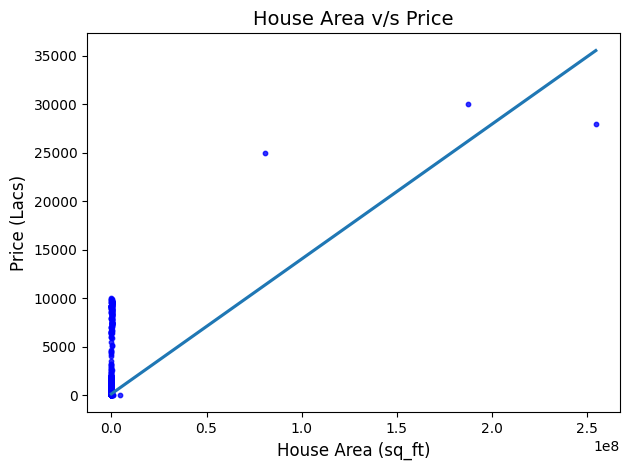

In [11]:
# Extract the most important columns
area_sqft = df["SQUARE_FT"].values
bhk_count = df["BHK_NO."].values
house_price = df["TARGET(PRICE_IN_LACS)"].values

# Creating a regression plot
sns.regplot(
    x=area_sqft,
    y=house_price,
    scatter_kws={'color':'b','s':10}, # to make a scatter_plot with color=blue and dot_size of 10 (medium)
    ci=None  # determines size of confidence for regression estimates. Generally avoided with Large datasets
)

plt.title("House Area v/s Price", fontsize=14)
plt.xlabel("House Area (sq_ft)", fontsize=12)
plt.ylabel("Price (Lacs)", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

**Removing the Outliers**

In [12]:
# We have to remove the outliers as it can be seen that some data is purely unrealistic and influencing the regression badly

# Filter out rows with extremely high prices (price < 600 lacs)
df = df[df['TARGET(PRICE_IN_LACS)'] < 600]

 # Filter out rows with unrealistic number of bedrooms (bhk < 10)
df = df[df['BHK_NO.'] < 10]

# Filter out rows with extremely high land_area (area < 6000 sq_ft)
df = df[df['SQUARE_FT'] < 6000]

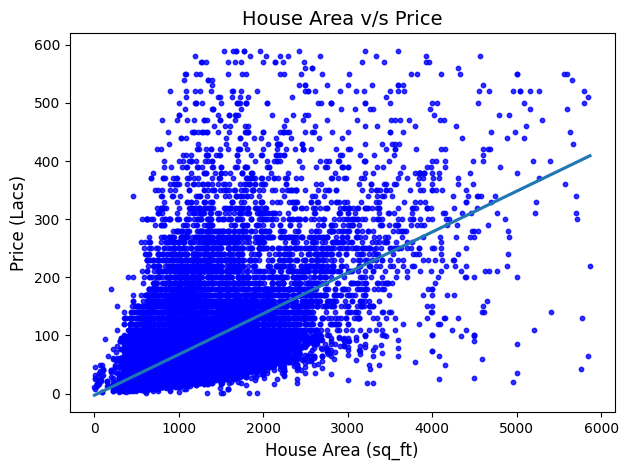

In [13]:
# Extract the most important columns
area_sqft = df["SQUARE_FT"].values
bhk_count = df["BHK_NO."].values
house_price = df["TARGET(PRICE_IN_LACS)"].values

# Creating a regression plot
sns.regplot(
    x=area_sqft,
    y=house_price,
    scatter_kws={'color':'b','s':10}, # to make a scatter_plot with color=blue and dot_size of 10 (medium)
    ci=None  # determines size of confidence for regression estimates. Generally avoided with Large datasets
)

plt.title("House Area v/s Price", fontsize=14)
plt.xlabel("House Area (sq_ft)", fontsize=12)
plt.ylabel("Price (Lacs)", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

**Linear Regression**

In [14]:
# Features and target
X = df[['BHK_NO.', 'SQUARE_FT']]
y = df['TARGET(PRICE_IN_LACS)']  

# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Applying Linear regression with two features, bhk_count and sq_ft area
linear_regression = LinearRegression()

# Training the linear regression model
model = linear_regression.fit(X_train,y_train)
output = model.predict(X_test)

# Print metrics             
print("intercept:",model.intercept_)
print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

intercept: -6.998361096540663
coef: [4.677954   0.06487589]
RScore: 0.30963861887220445
MAE: 44.37285470601695


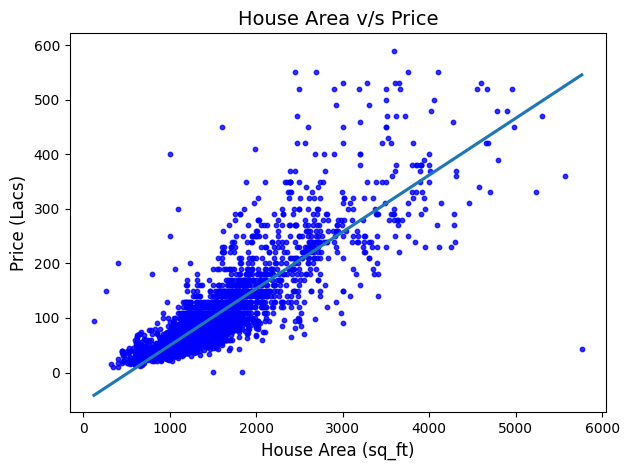

intercept: -42.83401633644961
coef: [-7.40778264  0.10882536]
RScore: 0.7469793020767708
MAE: 24.054469162055494


In [15]:
input_city = 'Bangalore'

new_df = df[df['CITY'] == input_city].copy()

# get the lists of the important columns
area_sqft = list(new_df['SQUARE_FT'])
bhk_count = list(new_df['BHK_NO.'])
house_price = list(new_df['TARGET(PRICE_IN_LACS)'])

# Creating a regression plot
sns.regplot(
    x=area_sqft,
    y=house_price,
    scatter_kws={'color':'b','s':10}, #
    ci=None  # 
)

plt.title("House Area v/s Price", fontsize=14)
plt.xlabel("House Area (sq_ft)", fontsize=12)
plt.ylabel("Price (Lacs)", fontsize=12)
plt.tight_layout()
plt.show()

# Features and target
X = new_df[['BHK_NO.', 'SQUARE_FT']]
y = new_df['TARGET(PRICE_IN_LACS)']  

# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Applying Linear regression with two features, bhk_count and sq_ft area
linear_regression = LinearRegression()

# Training the linear regression model
model = linear_regression.fit(X_train,y_train)
output = model.predict(X_test)

# Print metrics             
print("intercept:",model.intercept_)
print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

**Polynomial Regression**

In [16]:
# Features and target
X = df[['BHK_NO.', 'SQUARE_FT']]
y = df['TARGET(PRICE_IN_LACS)']  

# It allows us to generate polynomial features 
poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)

# Training the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)
output = model.predict(X_test)

# Print metrics
print("intercept:",model.intercept_)
print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

intercept: 9.878675452103536
coef: [ 0.00000000e+00  1.05880190e+01  2.69243718e-02 -1.84094319e+00
  6.19624816e-03  3.94673910e-06]
RScore: 0.3211970613317915
MAE: 43.750495275484


In [17]:
# Features and target
X = new_df[['BHK_NO.', 'SQUARE_FT']]
y = new_df['TARGET(PRICE_IN_LACS)']  

# It allows us to generate polynomial features 
poly = PolynomialFeatures(degree=2)  
X_poly = poly.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=1)

# Training the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)
output = model.predict(X_test)

# Print metrics
print("intercept:",model.intercept_)
print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

intercept: 0.005262638767788985
coef: [ 0.00000000e+00 -5.18877340e+01  1.26953630e-01  4.26645152e+00
  1.03093635e-02 -1.09462209e-05]
RScore: 0.7445041296094692
MAE: 24.300148130569188


**Ridge Regression**

In [19]:
# Features and target
X = df[['BHK_NO.', 'SQUARE_FT']]
y = df['TARGET(PRICE_IN_LACS)']  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the Ridge regression model
ridge = Ridge(alpha = 0.1)  #
model = ridge.fit(X_train,y_train)
output = model.predict(X_test)

# Print metrics             
print("intercept:",model.intercept_)
print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

intercept: -6.998273870818849
coef: [4.67787379 0.06487597]
RScore: 0.3096386267370518
MAE: 44.37285156378706


In [20]:
input_city = 'Bangalore'

new_df = df[df['CITY'] == input_city].copy()

# Features and target
X = new_df[['BHK_NO.', 'SQUARE_FT']]
y = new_df['TARGET(PRICE_IN_LACS)']  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the Ridge regression model
ridge = Ridge(alpha = 0.1)  #
model = ridge.fit(X_train,y_train)
output = model.predict(X_test)

# Print metrics             
print("intercept:",model.intercept_)
print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

intercept: -42.83536379507221
coef: [-7.40677082  0.10882453]
RScore: 0.7469790823383397
MAE: 24.054503131229033


**RandomForest Regressor**

In [21]:
# Features and target
X = df[['BHK_NO.', 'SQUARE_FT']]
y = df['TARGET(PRICE_IN_LACS)']  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the RandomForest regression model
random_reg = RandomForestRegressor()
model = random_reg.fit(X_train,y_train)
output = model.predict(X_test)

             
# Print metrics             
# print("intercept:",model.intercept_)
# print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

RScore: 0.26517793039520665
MAE: 41.70128431271115


In [22]:
input_city = 'Bangalore'

new_df = df[df['CITY'] == input_city].copy()

# Features and target
X = df[['BHK_NO.', 'SQUARE_FT']]
y = df['TARGET(PRICE_IN_LACS)']  

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Training the RandomForest regression model
random_reg = RandomForestRegressor()
model = random_reg.fit(X_train,y_train)
output = model.predict(X_test)

             
# Print metrics             
# print("intercept:",model.intercept_)
# print("coef:",model.coef_)
print("RScore:",metrics.r2_score(y_test,output))
print("MAE:",metrics.mean_absolute_error(y_test,output))

RScore: 0.26442293384999904
MAE: 41.67080169927172


**Hence, Linear Regression is the best among all Regression techniques, for the choosen dataset**

**Example- Price Predictor**

In [23]:
input_city = 'Bangalore' # user input
input_bhk = 2   # user input
input_area = 900     # user input

new_df = df[df['CITY'] == input_city].copy()

# Applying 'Linear regression' model
# Features and target
X = new_df[['BHK_NO.', 'SQUARE_FT']]
y = new_df['TARGET(PRICE_IN_LACS)']

lm = LinearRegression()

# Training the model
lm.fit(X, y)

coeffs = lm.coef_
a1, a2 = coeffs[0], coeffs[1]
b1 = lm.intercept_
predicted_price = a1*input_bhk + a2*input_area + b1
print(f' Predicted Price for a house in Bangalore with {input_bhk}-BHK and {input_area} sq_ft : {int(predicted_price)} Lacs')


 Predicted Price for a house in Bangalore with 2-BHK and 900 sq_ft : 39 Lacs
